# Reading Rigol Stored Waveforms

**Scott Prahl**

**Jan 2020**

## Introduction

So you have saved a trace with the Rigol scope as a file and want to use it.

Unfortunately the offical Rigol [Converter](https://rigol.desk.com/customer/en/portal/articles/2282335-wfm-converter) does not lend itself to programmatic control.

At the moment, there is not another universal option.  Rigol has not published the file format, so various people have tried to decode Rigol `.wfm` files.  The two most complete are bundled in this `RigolWFM` package

* A parser for [DS1000E](https://github.com/mabl/pyRigolWFM) scopes. 

* A parser for [DS1000Z](https://github.com/michal-szkutnik/pyRigolWfm1000Z) scopes.

This notebook gives an example of how to use the `RigolWFM` package to read files from the DS1102 and the DS1052.  I don't have a waveform file from a DS1054Z to test with yet.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import RigolWFM.wfm as wfm
except:
    print("***** You need to install the module to read Rigol files first *****")
    print("***** Execute the following line in a new cell, then retry     *****")
    print()
    print("!{sys.executable} -m pip install RigolWFM")

## Example of single trace waveform from local file

First let's have look at the description of the internal file structure. We see that only channel 1 has been enabled.

In [2]:
filename = "DS1102E.wfm"
x = wfm.describe(filename)
print(x)


General
Cur. selected channel    : CH1
Alternate trigger        : False

Channel CH1
Enabled                  : 1
Probe attenuation        : 1.0
Y grid scale             : 1.000e+00 V/div
Y shift                  : -3.440e+00 V
Y inverted               : 0
Time grid scale          : 1.000e-01 s/div
Samplerate               : 1.365e+04 Samples/s
Time delay               : -4.560e-01 s
No. of recorded samples  : 16384

Trigger
Mode                     : Edge
Source                   : CH2
Coupling                 : DC
Sweep                    : Auto
Holdoff                  : 5.000e-07 s
Sensitivity              : 3.800e-01 div
Level                    : 4.800e-01 V
Edge direction           : FALL

Channel CH2
Enabled                  : 0

Trigger
Mode                     : Edge
Source                   : CH2
Coupling                 : DC
Sweep                    : Auto
Holdoff                  : 5.000e-07 s
Sensitivity              : 3.800e-01 div
Level                    : 4.800e-01 V

We know that there is a single trace so the following code will work.  The variable `data` will be a list of arrays. Because the data was saved when only one channel was active, the `len(data)` will be 2.  This means that `time = data[0]` and `voltage=data[1]`

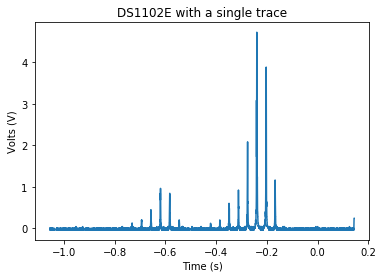

In [3]:
data = wfm.signals(filename)

t,y = data
plt.plot(t,y)
plt.xlabel("Time (s)")
plt.ylabel("Volts (V)")
plt.title("DS1102E with a single trace")
plt.show()


## Example of dual trace waveform from URL

In [4]:
filename = "https://github.com/scottprahl/RigolWFM/blob/master/doc/DS1052E.wfm?raw=true"
x = wfm.describe(filename)
print(x)


General
Cur. selected channel    : CH1
Alternate trigger        : False

Channel CH1
Enabled                  : 1
Probe attenuation        : 10.0
Y grid scale             : 1.000e+00 V/div
Y shift                  : 2.000e+00 V
Y inverted               : 0
Time grid scale          : 1.000e-07 s/div
Samplerate               : 5.000e+08 Samples/s
Time delay               : 0.000e+00 s
No. of recorded samples  : 8192

Trigger
Mode                     : Edge
Source                   : CH2
Coupling                 : DC
Sweep                    : Auto
Holdoff                  : 5.000e-07 s
Sensitivity              : 3.800e-01 div
Level                    : 2.400e+00 V
Edge direction           : RISE

Channel CH2
Enabled                  : 1
Probe attenuation        : 1.0
Y grid scale             : 2.000e+00 V/div
Y shift                  : -6.000e+00 V
Y inverted               : 0
Time grid scale          : 1.000e-07 s/div
Samplerate               : 5.000e+08 Samples/s
Time delay           

We know that there are two traces so the following code will work

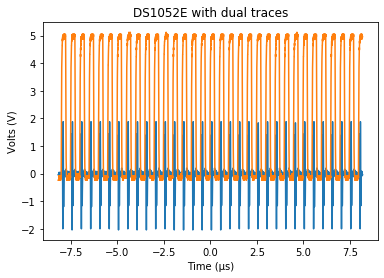

In [5]:
data = wfm.signals(filename)

t,y1,y2 = data
plt.plot(t * 1e6, y1)
plt.plot(t * 1e6, y2)

plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.title("DS1052E with dual traces")

plt.show()


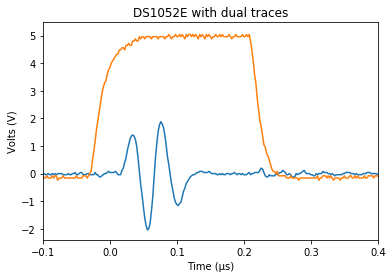

In [6]:
### Finally, just zoom in on a bit of the data

plt.plot(t * 1e6, y1)
plt.plot(t * 1e6, y2)

plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.title("DS1052E with dual traces")
plt.xlim(-0.1,0.4)
plt.show()